# 3. 初めての機械学習

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from torch import optim

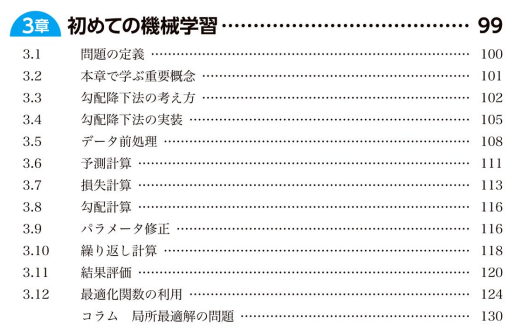

## 3.1. 問題の定義

- 勾配計算機能を使って線形回帰を解いてみる

## 3.2. 本章で学ぶ重要概念

- 勾配降下法
    - 高度なDLでも全く同じように使われる重要な概念
- 予測計算
- 損失計算
- 勾配計算
- パラメメータ修正

## 3.3. 勾配降下法の考え方

- 勾配は損失の偏微分ベクトルで，この値を元に値を更新していく
- MLPの深層学習とかでちゃんと読む(多分読まないｗ)

## 3.4. 勾配降下法の実装


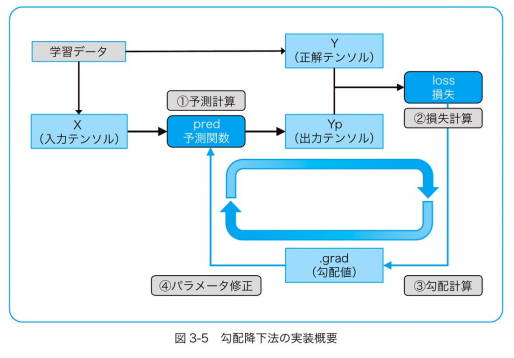

## 3.5. データ前処理

In [8]:
# (身長, 体重)のサンプルデータ
sampel_data_1 = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],])
print(sampel_data_1.shape)
print(sampel_data_1)

(5, 2)
[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


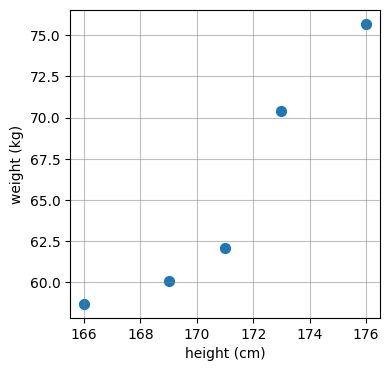

In [9]:
x = sampel_data_1[:, 0]
y = sampel_data_1[:, 1]

# 散布図で確認
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
ax.scatter(x, y, s=50)
ax.set_xlabel('height (cm)')
ax.set_ylabel('weight (kg)')
ax.grid(c='gray', alpha=0.5)
plt.show()

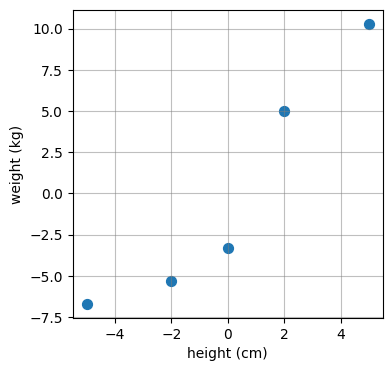

In [10]:
# 勾配加工法を行いやすくするために平均を引く
X = x - x.mean()
Y = y - y.mean()

# 散布図で確認
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
ax.scatter(X, Y, s=50)
ax.set_xlabel('height (cm)')
ax.set_ylabel('weight (kg)')
ax.grid(c='gray', alpha=0.5)
plt.show()

## 3.6. 予測計算 

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


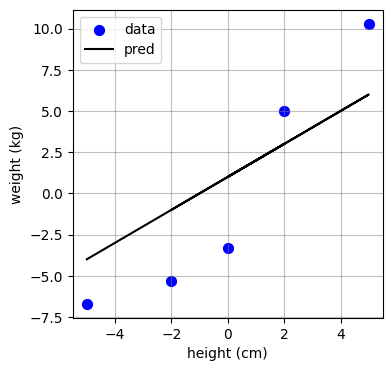

In [11]:
# テンソル化
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
# パラメータ定義
# Y = WX + B の WとB
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
# 予測関数(1次関数)
pred = lambda X : W * X + B
# 予測値の計算
Yp = pred(X)
print(Yp)

# まだパラメータ更新してないので初期値のまま
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
ax.scatter(X.data, Y.data, s=50, c='blue', label='data')
ax.plot(X.data, Yp.data, c='black', label='pred')
ax.set_xlabel('height (cm)')
ax.set_ylabel('weight (kg)')
ax.legend(loc = 'upper left')
ax.grid(c='gray', alpha=0.5)
plt.show()

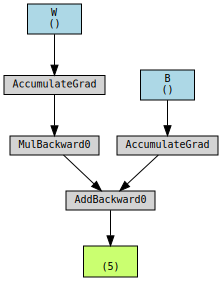

In [12]:
# 計算グラフ
params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)

## 3.7. 損失計算

tensor(13.3520, grad_fn=<MeanBackward0>)


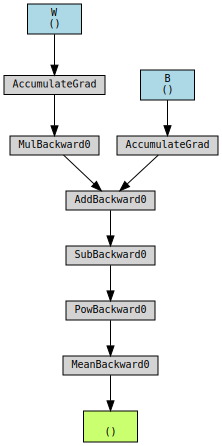

In [13]:
# 損失関数
def mse(Yp, Y):
    # 平均2乗誤差
    loss = ((Yp - Y)**2).mean()
    return loss

loss = mse(Yp, Y)
print(loss)

# 計算グラフ(追加分が損失関数の部分)
params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

## 3.8. 勾配計算

In [14]:
loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


## 3.9. パラメータ修正

In [16]:
lr = 1e-3

# だめ：勾配計算をしている最中の変数(WとB)は，他に影響が及ぶので勝手に値を更新できない
# W -= lr * W.grad
# B -= lr * B.grad

# 一時的に計算グラフ機能を停止し，パラメータを更新する
with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    # 計算済みの勾配はリセットする
    W.grad.zero_()
    B.grad.zero_()

# デフォルトとあんま変わんないけど一応パラメータ更新できた
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


## 3.10. 繰り返し計算

In [17]:
# 初期化
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 1e-3

history = np.zeros((0, 2)) # 結果記録用

In [20]:
for epoch in range(num_epochs):
    # 予測
    Yp = pred(X)
    # 損失計算
    loss = mse(Yp, Y)
    # 勾配計算
    loss.backward()
    # パラメータ更新
    with torch.no_grad():

        W -= lr * W.grad
        B -= lr * B.grad
        # 初期化
        W.grad.zero_()
        B.grad.zero_()
    # 10階ごとに記録
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} | loss = {loss: .4f}")

epoch = 0 | loss =  13.3520
epoch = 10 | loss =  10.3855
epoch = 20 | loss =  8.5173
epoch = 30 | loss =  7.3364
epoch = 40 | loss =  6.5858
epoch = 50 | loss =  6.1047
epoch = 60 | loss =  5.7927
epoch = 70 | loss =  5.5868
epoch = 80 | loss =  5.4476
epoch = 90 | loss =  5.3507
epoch = 100 | loss =  5.2805
epoch = 110 | loss =  5.2275
epoch = 120 | loss =  5.1855
epoch = 130 | loss =  5.1507
epoch = 140 | loss =  5.1208
epoch = 150 | loss =  5.0943
epoch = 160 | loss =  5.0703
epoch = 170 | loss =  5.0480
epoch = 180 | loss =  5.0271
epoch = 190 | loss =  5.0074
epoch = 200 | loss =  4.9887
epoch = 210 | loss =  4.9708
epoch = 220 | loss =  4.9537
epoch = 230 | loss =  4.9373
epoch = 240 | loss =  4.9217
epoch = 250 | loss =  4.9066
epoch = 260 | loss =  4.8922
epoch = 270 | loss =  4.8783
epoch = 280 | loss =  4.8650
epoch = 290 | loss =  4.8522
epoch = 300 | loss =  4.8399
epoch = 310 | loss =  4.8281
epoch = 320 | loss =  4.8167
epoch = 330 | loss =  4.8058
epoch = 340 | loss =  4

## 3.10. 結果評価

In [21]:
print(f"W = {W.data.numpy()}")
print(f"B = {B.data.numpy()}")
print(f"start loss: {history[0,1]:.4f}")
print(f"end   loss: {history[-1,1]:.4f}")

W = 1.8206830024719238
B = 0.3675113916397095
start loss: 13.3520
end   loss: 4.6796


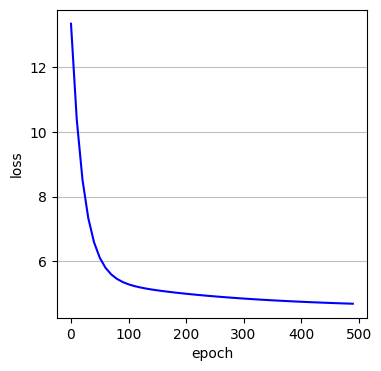

In [23]:
# 損失ログ
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
ax.plot(history[:,0], history[:,1], c='blue')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.grid(axis='y', c='gray', alpha=0.5)
plt.show()

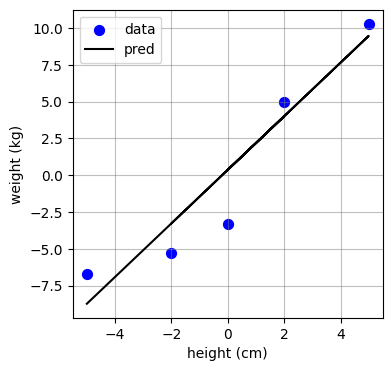

In [25]:
# 更新したパラメータで回帰
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
ax.scatter(X.data, Y.data, s=50, c='blue', label='data')
ax.plot(X.data, Yp.data, c='black', label='pred')
ax.set_xlabel('height (cm)')
ax.set_ylabel('weight (kg)')
ax.legend(loc = 'upper left')
ax.grid(c='gray', alpha=0.5)
plt.show()

## 3.12. 最適化関数の利用

- 前節までは手作業でパラメータ更新をしていたが，本来は最適化関数を使う

In [28]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
num_epochs = 500
lr = 1e-3
optimizer = optim.SGD([W, B], lr=lr)
history = np.zeros((0, 2))

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Y, Yp)
    loss.backward()
    optimizer.step() # パラメータ修正
    optimizer.zero_grad() # 勾配初期化
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f"epoch = {epoch} | loss = {loss: .4f}")

epoch = 0 | loss =  13.3520
epoch = 10 | loss =  10.3855
epoch = 20 | loss =  8.5173
epoch = 30 | loss =  7.3364
epoch = 40 | loss =  6.5858
epoch = 50 | loss =  6.1047
epoch = 60 | loss =  5.7927
epoch = 70 | loss =  5.5868
epoch = 80 | loss =  5.4476
epoch = 90 | loss =  5.3507
epoch = 100 | loss =  5.2805
epoch = 110 | loss =  5.2275
epoch = 120 | loss =  5.1855
epoch = 130 | loss =  5.1507
epoch = 140 | loss =  5.1208
epoch = 150 | loss =  5.0943
epoch = 160 | loss =  5.0703
epoch = 170 | loss =  5.0480
epoch = 180 | loss =  5.0271
epoch = 190 | loss =  5.0074
epoch = 200 | loss =  4.9887
epoch = 210 | loss =  4.9708
epoch = 220 | loss =  4.9537
epoch = 230 | loss =  4.9373
epoch = 240 | loss =  4.9217
epoch = 250 | loss =  4.9066
epoch = 260 | loss =  4.8922
epoch = 270 | loss =  4.8783
epoch = 280 | loss =  4.8650
epoch = 290 | loss =  4.8522
epoch = 300 | loss =  4.8399
epoch = 310 | loss =  4.8281
epoch = 320 | loss =  4.8167
epoch = 330 | loss =  4.8058
epoch = 340 | loss =  4

In [29]:
print(f"W = {W.data.numpy()}")
print(f"B = {B.data.numpy()}")
print(f"start loss: {history[0,1]:.4f}")
print(f"end   loss: {history[-1,1]:.4f}")

W = 1.8206830024719238
B = 0.3675113916397095
start loss: 13.3520
end   loss: 4.6796


In [31]:
# 確率勾配降下法のmomentum値を使用してチューニングしてみる
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()
num_epochs = 500
lr = 1e-3
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)
history2 = np.zeros((0, 2))

for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Y, Yp)
    loss.backward()
    optimizer.step() # パラメータ修正
    optimizer.zero_grad() # 勾配初期化
    if epoch % 10 == 0:
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        # print(f"epoch = {epoch} | loss = {loss: .4f}")

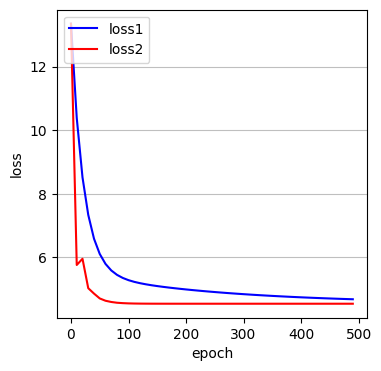

In [32]:
# 最適化にパラメータを与えた場合と比較
# momentumの方が収束が速い
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
ax.plot(history[:,0], history[:,1], c='blue', label='loss1')
ax.plot(history2[:,0], history2[:,1], c='red', label='loss2')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(loc = 'upper left')
ax.grid(axis='y', c='gray', alpha=0.5)
plt.show()